In [2]:
import os
import sys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load and prepare the data
data_path = "./data/yfinance_data/yfinance_data/META_historical_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,46704200
2012-12-13,27.590000,28.750000,27.430000,28.240000,81051600
2012-12-14,28.180000,28.330000,26.760000,26.809999,91631600
2012-12-17,26.770000,27.000000,26.320000,26.750000,57742500
2012-12-18,26.959999,27.910000,26.900000,27.709999,60512900


In [4]:
# check for missing values
print(df.isnull().sum())
df.head()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Open,High,Low,Close,Volume
Date,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,46704200
2012-12-13,27.590000,28.750000,27.430000,28.240000,81051600
2012-12-14,28.180000,28.330000,26.760000,26.809999,91631600
2012-12-17,26.770000,27.000000,26.320000,26.750000,57742500
2012-12-18,26.959999,27.910000,26.900000,27.709999,60512900


In [5]:
from src.outlier import OutlierDetection

detector = OutlierDetection(df)

outliers = detector.iqr_outliers()  
cleaned_df = detector.remove_outliers() 


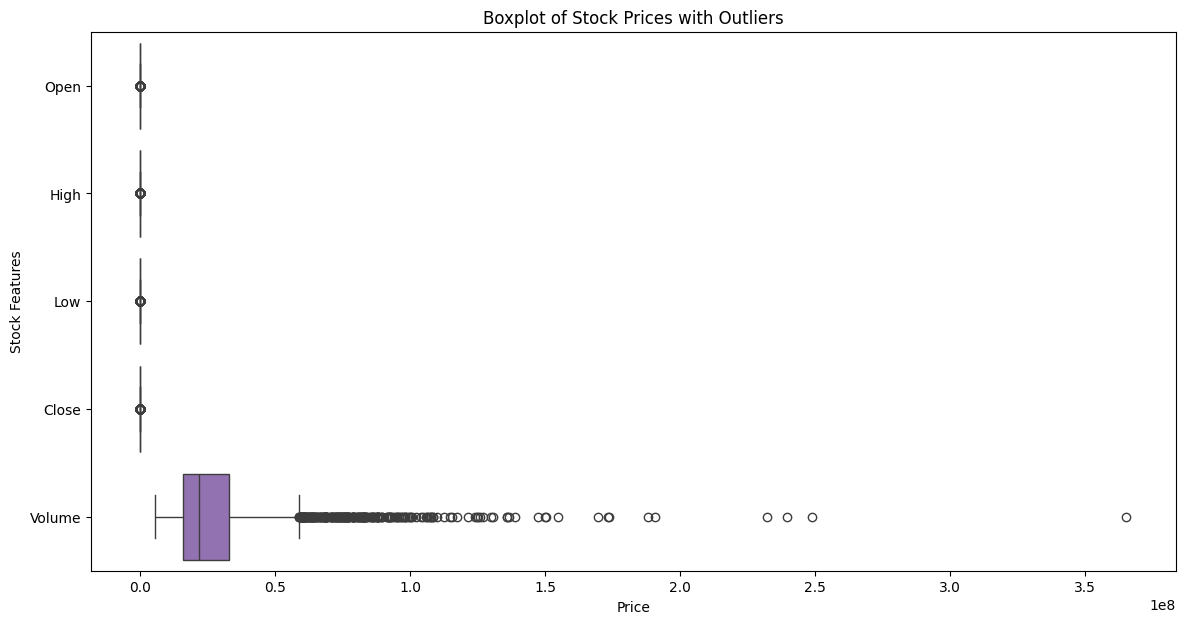

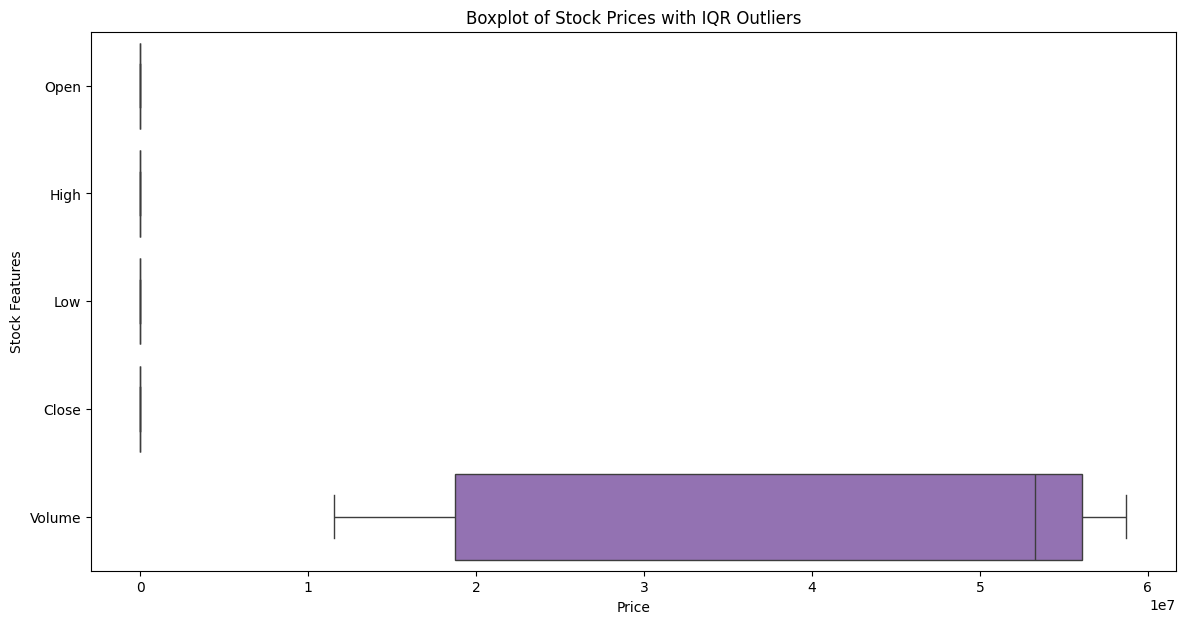

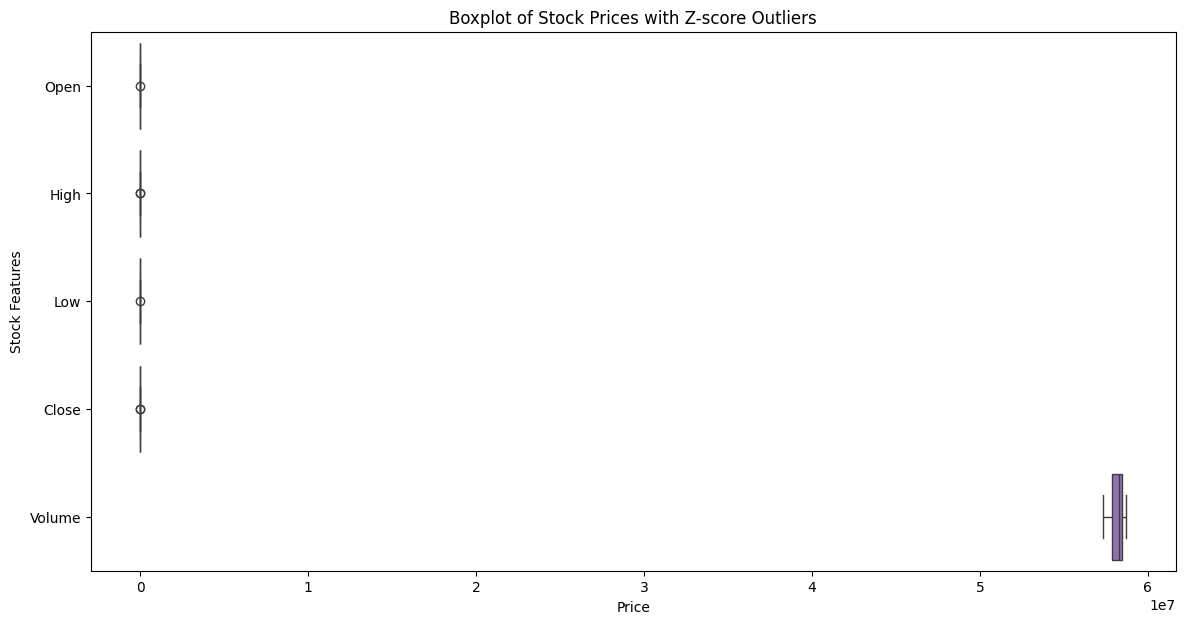

Processed data saved to ./data/yfinance_data/processed/META_processed_data.csv


In [7]:
# Get outliers using IQR method
outliers_dict = detector.iqr_outliers()

# Plotting the original data
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Stock Prices with Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_outliers.png')

# Plotting the IQR outliers
plt.figure(figsize=(14, 7))
# Combine all outlier DataFrames into one
all_outliers = pd.concat(outliers_dict.values(), keys=outliers_dict.keys())
sns.boxplot(data=all_outliers, orient='h')
plt.title('Boxplot of Stock Prices with IQR Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_iqr_outliers.png')

# Plotting the Z-score outliers
plt.figure(figsize=(14, 7))
z_score_outliers_dict = detector.z_score_outliers()
all_z_score_outliers = pd.concat(z_score_outliers_dict.values(), keys=z_score_outliers_dict.keys())
sns.boxplot(data=all_z_score_outliers, orient='h')
plt.title('Boxplot of Stock Prices with Z-score Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_z_score_outliers.png')

# Display the plots
plt.show()

# Save the processed data
output_path = "./data/yfinance_data/processed/META_processed_data.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=True)
print(f"Processed data saved to {output_path}")

In [ ]:
from src.technical_indicators import TechnicalIndicators